#Improving Computer Vision Accuracy using Convolutions

지금까지 Deep Neural Network (DNN) 를 이용해서 패션 mnist 를 분류했다.  

정확도가, 트레이닝셋은 89% 정도이고 테스트셋으로는  87% 정도가 나왔다. 

이제 Convolutional Neural Networks 이용해서 정확도를 향상시켜본다.




트레이닝셋은 93% , 테스트셋은 91% 까지 나온다.


에포크를 20까지 해보면, 트레이닝셋 정확도는 올라가지만 밸리데이션 정확도는 내려간다. 즉, 오버핏팅이 된다.







```
import tensorflow as tf
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images.reshape(60000, 28, 28, 1)
training_images=training_images / 255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images=test_images/255.0
```


다음처럼 모델링 해서 돌려보자


```
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
```


convolution 레이어 셋팅



```
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2)
```


DNN 구조를 붙이기 위해, 플래튼 한다.

```
  tf.keras.layers.Flatten(),
```


128 dense layers 와 10 output layers 를 셋팅한다.



```
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
```


컴파일하여 학습하고, 평가해 보자



```
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=5)
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(test_acc)
```


# Visualizing the Convolutions and Pooling



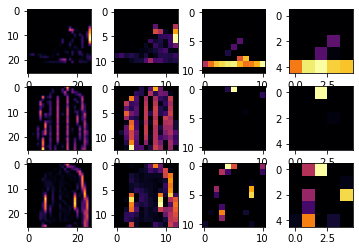

In [ ]:
import matplotlib.pyplot as plt
f, axarr = plt.subplots(3,4)
FIRST_IMAGE=0
SECOND_IMAGE=7
THIRD_IMAGE=26
CONVOLUTION_NUMBER = 1
from tensorflow.keras import models
layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)
for x in range(0,4):
  f1 = activation_model.predict(test_images[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[0,x].grid(False)
  f2 = activation_model.predict(test_images[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[1,x].grid(False)
  f3 = activation_model.predict(test_images[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[2,x].grid(False)

EXERCISES

1. 컨볼루션 필터 갯수를 16 또는  64로 바꿔서 정확도를 확인하라.  

2. 맨 마지막 컨볼루션 지우고 해본다.

3. 콜백 셋팅해서 돌려본다.